In [38]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
import numpy as np
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from operator import itemgetter
from qiskit.circuit.library import MCMT

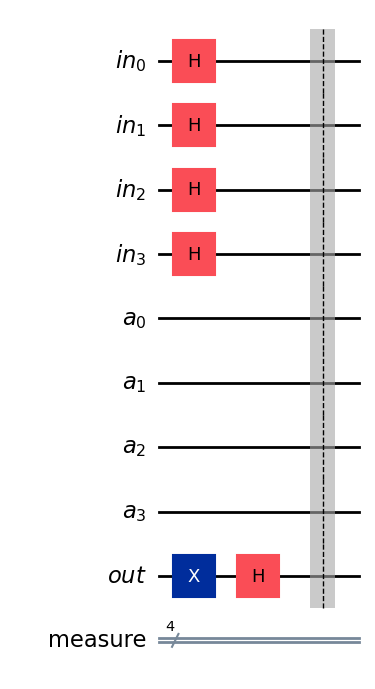

In [39]:
var_qubits = QuantumRegister(4, name='in')
clause_qubits = QuantumRegister(4, name='a')
output= QuantumRegister(1, name='out')
classical = ClassicalRegister(4, name='measure')
qc = QuantumCircuit(var_qubits, clause_qubits, output,classical)

for i in range(4):
    qc.h(i)

qc.x(output)
qc.h(output)

qc.barrier()

qc.draw(output='mpl')




In [40]:
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

In [41]:
def oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mcx(clause_qubits, output)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1
    qc.barrier()
# oracle(qc, clause_list, clause_qubits)
# qc.draw('mpl')



In [42]:
def diffuser(qc):
    for i in range(4):
        qc.h(i)
        qc.x(i)
    qc.h(0)
    qc.mcx([1,2,3], 0)
    qc.h(0)
    for i in range(4):
        qc.x(i)
        qc.h(i)
    qc.barrier()

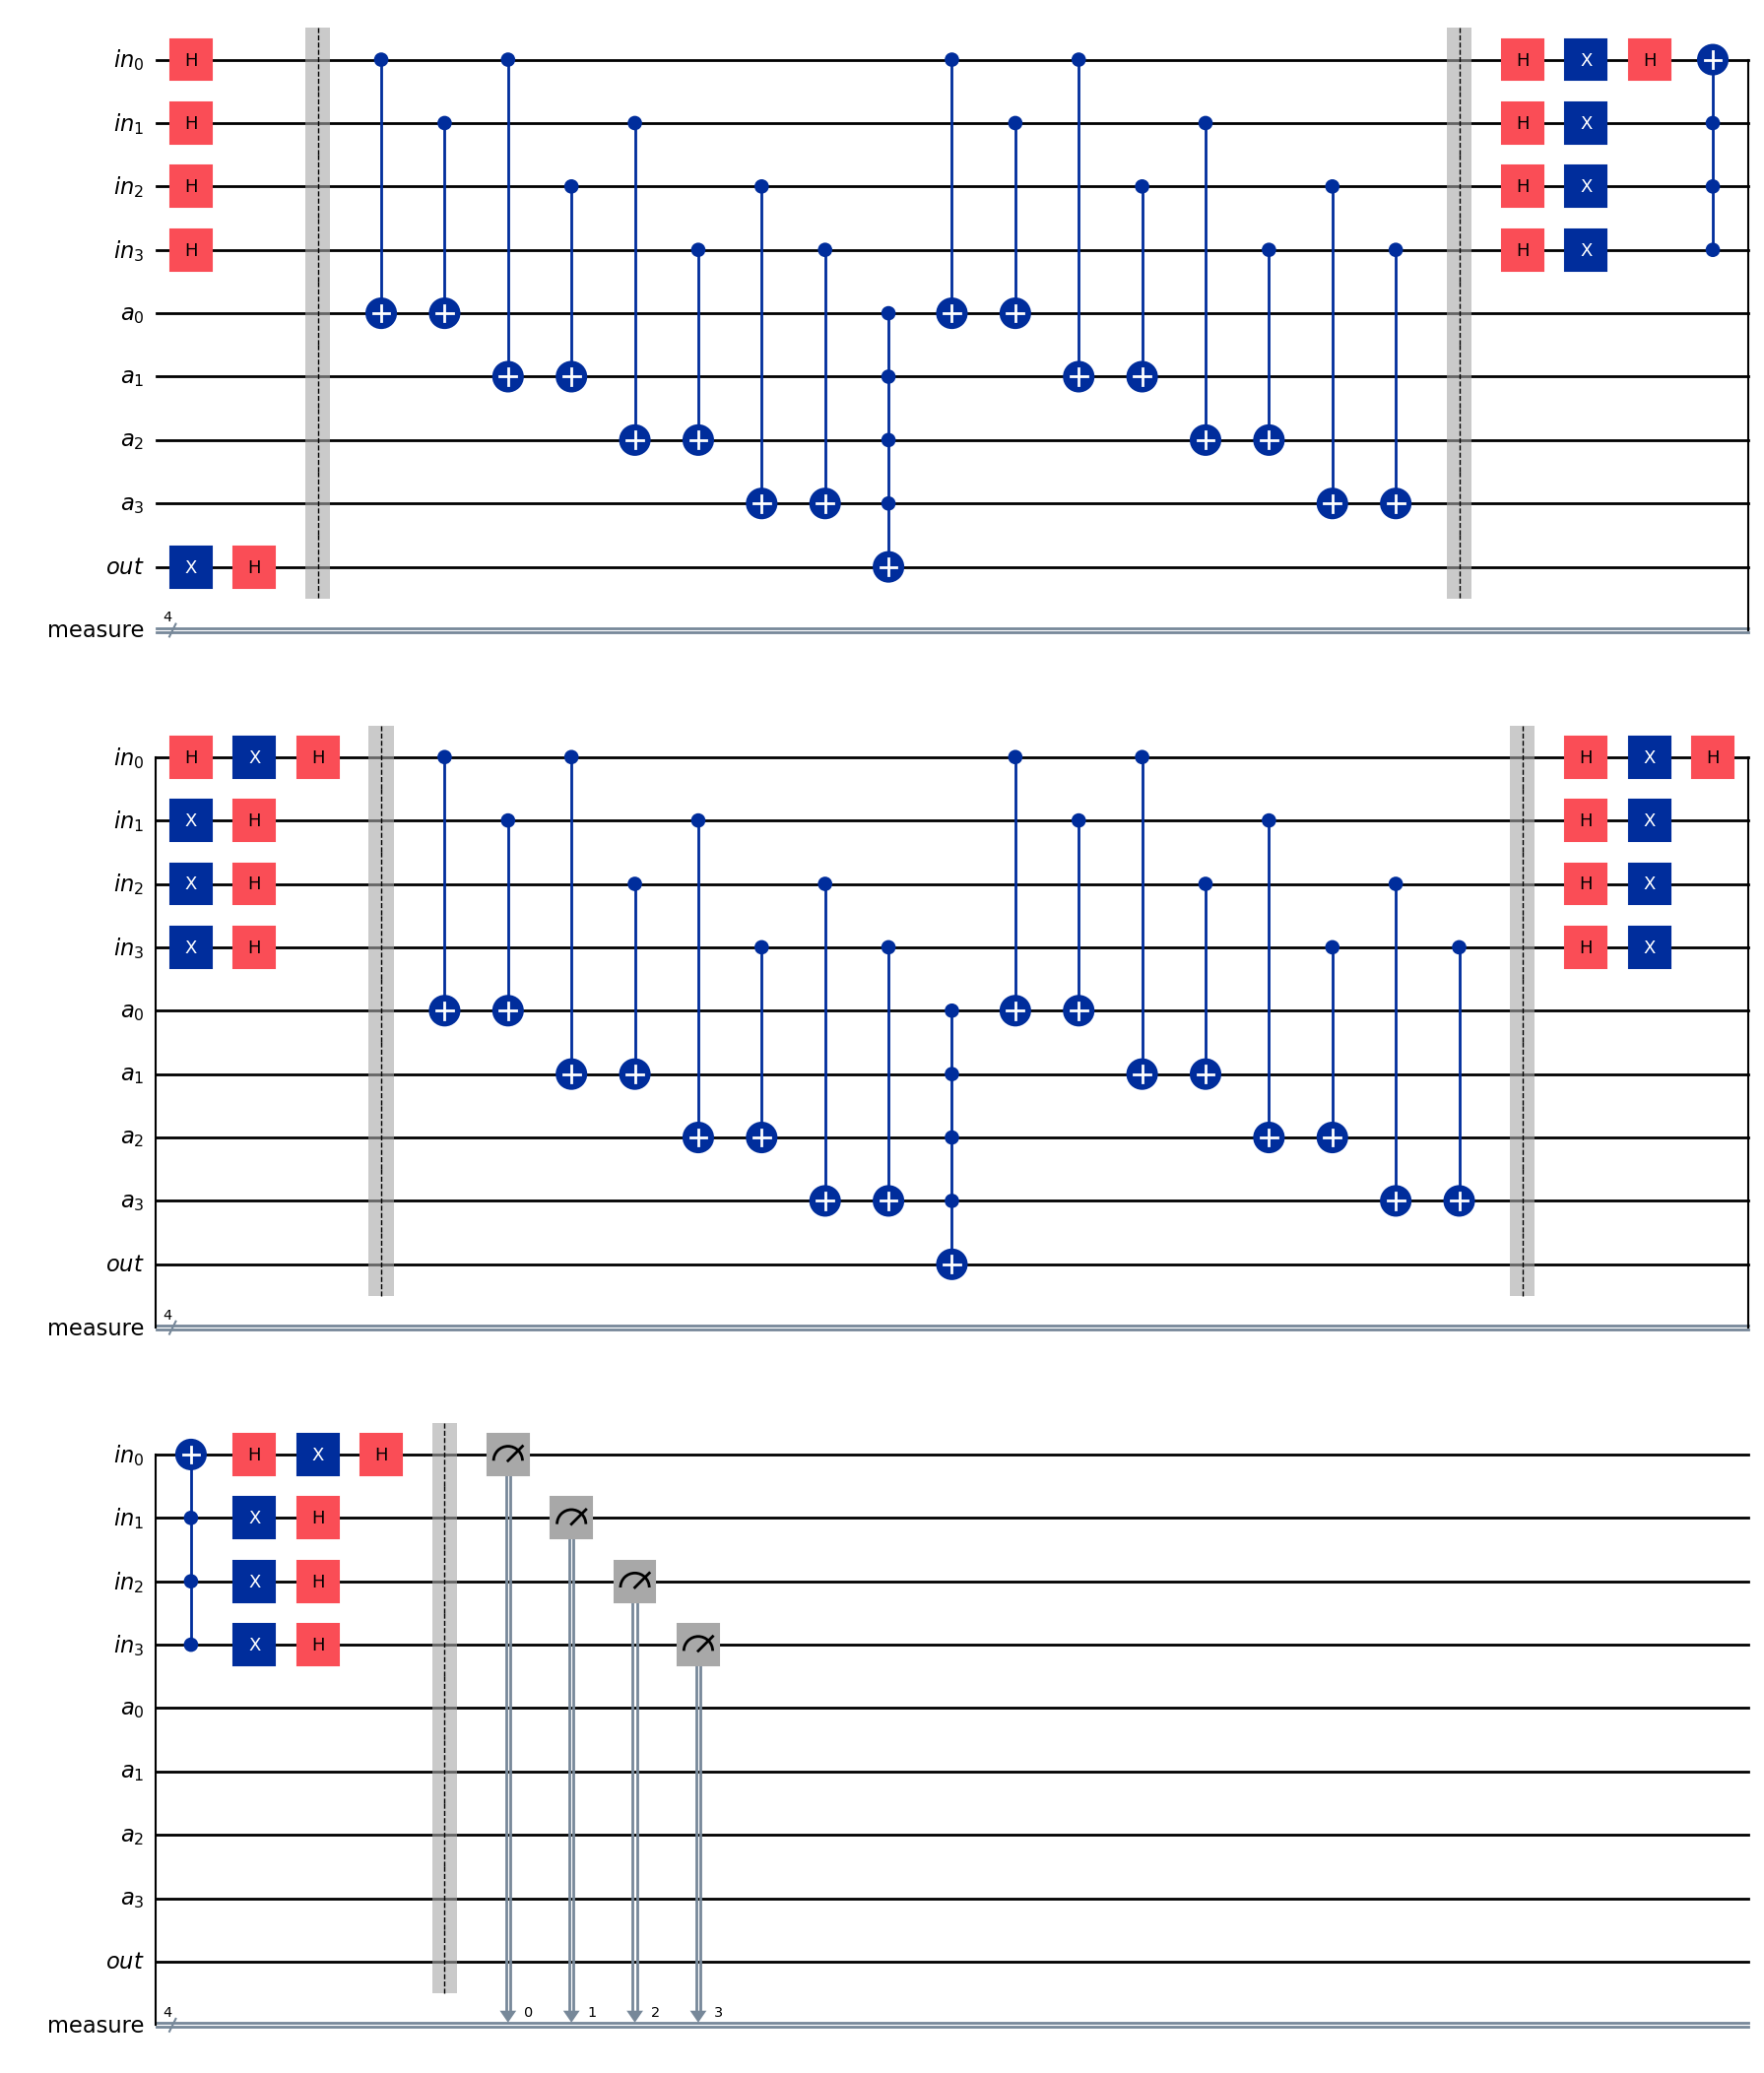

In [43]:
n = 2
for i in range (n):
    oracle(qc, clause_list, clause_qubits)
    diffuser(qc)

qc.measure(var_qubits, classical)
qc.draw(output='mpl')

In [44]:
def print_sudoku(results):
    for key, count in results.items():
        # Split the key into individual characters and convert to integers
        grid = [int(bit) for bit in key]
        
        # Convert to numpy array and reshape to 2x2
        sudoku_grid = np.array(grid).reshape(2, 2)
        
        # Print the Sudoku grid
        print("Configuration with counts", count)
        print(sudoku_grid)
        print('\n')

Counts: {'1111': 4, '0110': 501, '1010': 5, '1001': 469, '0111': 8, '0011': 3, '1100': 4, '0100': 7, '0010': 5, '0000': 5, '1011': 3, '0001': 1, '0101': 5, '1110': 2, '1000': 1, '1101': 1}


C:\Users\26550\AppData\Local\Temp\ipykernel_11856\674556205.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


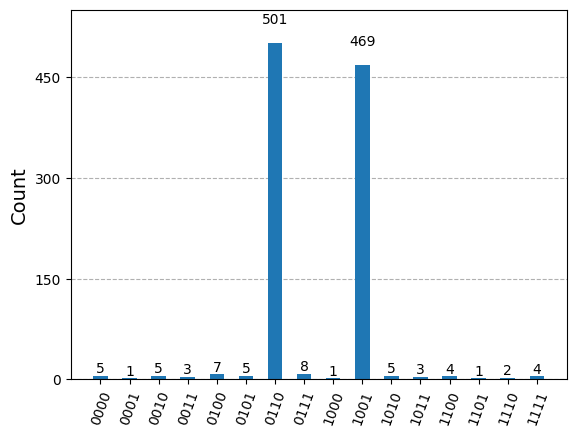

In [45]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()
answer = result.get_counts(qc)
print("Counts:", answer)
plot_histogram(answer)


In [46]:
res = dict(sorted(answer.items(), key=itemgetter(1), reverse=True)[:2])
#print the sudoku schemas
print('the solutions are:')
print_sudoku(res)

the solutions are:
Configuration with counts 501
[[0 1]
 [1 0]]


Configuration with counts 469
[[1 0]
 [0 1]]


